Assignment 1: Neural Networks

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
imdb = keras.datasets.imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [5]:
word_index=imdb.get_word_index()
reverse_word_index=dict(
                    [(value,key) for (key,value) in word_index.items()])
decoded_review = "".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

In [9]:
model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])


In [11]:
#creating validation set
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [12]:
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 98ms/step - loss: 0.5546 - accuracy: 0.7721 - val_loss: 0.4042 - val_accuracy: 0.8549
Epoch 2/20
30/30 [==============================] - 2s 82ms/step - loss: 0.2993 - accuracy: 0.8993 - val_loss: 0.2994 - val_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 2s 66ms/step - loss: 0.2022 - accuracy: 0.9337 - val_loss: 0.2754 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1482 - accuracy: 0.9536 - val_loss: 0.2804 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1125 - accuracy: 0.9685 - val_loss: 0.3024 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0862 - accuracy: 0.9790 - val_loss: 0.3186 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0651 - accuracy: 0.9862 - val_loss: 0.3423 - val_accuracy: 0.8781
Epoch 8/20
30

In [13]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

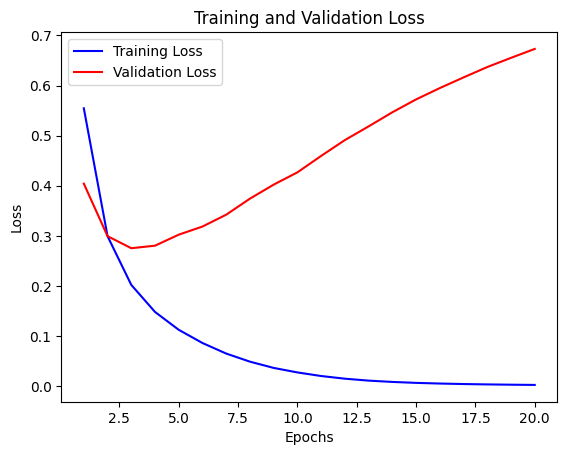

In [14]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

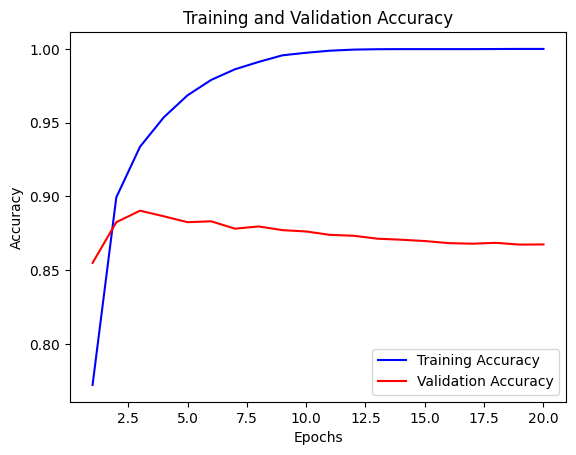

In [15]:
# Extract loss values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7275 - accuracy: 0.8558


In [17]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.00594444],
       [1.        ],
       [0.96707135],
       ...,
       [0.00110336],
       [0.00661215],
       [0.8637377 ]], dtype=float32)

## 1.You used two hidden layers. Try using one or three hidden layers and see how doing so affects validation and test accuracy.

In [18]:
model2=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [19]:
model2.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history2= model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 97ms/step - loss: 0.6039 - accuracy: 0.7443 - val_loss: 0.4590 - val_accuracy: 0.8542
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3323 - accuracy: 0.8976 - val_loss: 0.3049 - val_accuracy: 0.8799
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1995 - accuracy: 0.9327 - val_loss: 0.2787 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1374 - accuracy: 0.9561 - val_loss: 0.2956 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0960 - accuracy: 0.9720 - val_loss: 0.3198 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0656 - accuracy: 0.9847 - val_loss: 0.3583 - val_accuracy: 0.8768
Epoch 7/20
30/30 [==============================] - 2s 72ms/step - loss: 0.0422 - accuracy: 0.9929 - val_loss: 0.3951 - val_accuracy: 0.8782
Epoch 8/20
30

In [20]:
results2=model2.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.7530 - accuracy: 0.8590


## 2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [21]:
model3=keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [22]:
model3.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history3= model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 5s 102ms/step - loss: 0.5157 - accuracy: 0.7907 - val_loss: 0.3410 - val_accuracy: 0.8715
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2403 - accuracy: 0.9149 - val_loss: 0.2768 - val_accuracy: 0.8902
Epoch 3/20
30/30 [==============================] - 2s 70ms/step - loss: 0.1547 - accuracy: 0.9473 - val_loss: 0.2874 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1074 - accuracy: 0.9671 - val_loss: 0.3193 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0736 - accuracy: 0.9825 - val_loss: 0.3494 - val_accuracy: 0.8783
Epoch 6/20
30/30 [==============================] - 2s 76ms/step - loss: 0.0509 - accuracy: 0.9899 - val_loss: 0.3873 - val_accuracy: 0.8782
Epoch 7/20
30/30 [==============================] - 3s 86ms/step - loss: 0.0334 - accuracy: 0.9953 - val_loss: 0.4332 - val_accuracy: 0.8745
Epoch 8/20
3

In [23]:
results3=model3.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.7907 - accuracy: 0.8567


## 3. Try using the mse loss function instead of binary_crossentropy.

In [24]:
model.compile(optimizer="adam",
             loss="mse",
              metrics=["accuracy"])
history4= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 87ms/step - loss: 2.0590e-04 - accuracy: 0.9999 - val_loss: 0.1160 - val_accuracy: 0.8659
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 1.9826e-04 - accuracy: 0.9999 - val_loss: 0.1171 - val_accuracy: 0.8646
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 1.5706e-04 - accuracy: 1.0000 - val_loss: 0.1179 - val_accuracy: 0.8638
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 8.0067e-05 - accuracy: 1.0000 - val_loss: 0.1191 - val_accuracy: 0.8641
Epoch 5/20
30/30 [==============================] - 3s 84ms/step - loss: 4.3442e-05 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.8640
Epoch 6/20
30/30 [==============================] - 1s 50ms/step - loss: 2.2530e-05 - accuracy: 1.0000 - val_loss: 0.1202 - val_accuracy: 0.8632
Epoch 7/20
30/30 [==============================] - 1s 49ms/step - loss: 1.4919e-05 - accuracy: 1.0000 - val_loss: 0.1204 - val_ac

## 4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [25]:
model4=keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation = "tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [26]:
model4.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history4= model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 87ms/step - loss: 0.5116 - accuracy: 0.7893 - val_loss: 0.3711 - val_accuracy: 0.8598
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2716 - accuracy: 0.9076 - val_loss: 0.2840 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1816 - accuracy: 0.9407 - val_loss: 0.2720 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1309 - accuracy: 0.9623 - val_loss: 0.2846 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0964 - accuracy: 0.9756 - val_loss: 0.3031 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0717 - accuracy: 0.9843 - val_loss: 0.3297 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0521 - accuracy: 0.9907 - val_loss: 0.3579 - val_accuracy: 0.8765
Epoch 8/20
30

In [27]:
results4=model4.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6603 - accuracy: 0.8550


## 5. Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [28]:
model5=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

In [29]:
model5.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history5= model5.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.6213 - accuracy: 0.6649 - val_loss: 0.4995 - val_accuracy: 0.8402
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.4463 - accuracy: 0.8314 - val_loss: 0.3601 - val_accuracy: 0.8772
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3239 - accuracy: 0.8873 - val_loss: 0.2980 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2484 - accuracy: 0.9158 - val_loss: 0.2788 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 2s 69ms/step - loss: 0.1981 - accuracy: 0.9361 - val_loss: 0.2783 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1596 - accuracy: 0.9501 - val_loss: 0.2904 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1284 - accuracy: 0.9605 - val_loss: 0.3039 - val_accuracy: 0.8868
Epoch 8/20
30

In [30]:
results=model5.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.6797 - accuracy: 0.8620
